# 範例重點
了解如何在 Keras 中，加入 regularization <br />
熟悉建立、訓練模型 <br />
熟悉將訓練結果視覺化並比較結果 <br />

In [1]:
import os
import keras
from keras.layers import Input, Dense

#os.environ["CUDA_VISIBLE_DEVICES"] = ""
!nvidia-smi

Using TensorFlow backend.


Thu Jul 18 12:37:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


In [0]:
def preproc_x(x, flatten = True):
    x = x / 255.0
    if flatten :
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [0]:
train_x = preproc_x(train_x)
test_x = preproc_x(test_x)
train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [0]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128], drp_ratio = 0.2):
    
    input_layer = Input(input_shape, name = "main_input")
    
    for i , n_units in enumerate(num_neurons):
        
        if i == 0 :
            x = Dense(units = n_units, activation = 'relu', name = "hidden_layer" + str(i+1)) (input_layer)
        else:
            x = Dense(units = n_units, activation = 'relu', name = "hidden_layer" + str(i+1)) (x)
            
        x = keras.layers.Dropout(drp_ratio)(x)
        
    output_layer = Dense(units = output_units, activation = 'softmax', name = "main_output") (x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [0]:
#Setting hyper-parameters
lr = 1e-3
epochs = 50
batch_size = 256
momentum = 0.95
Dropout_EXP = 0.25

In [12]:
model = build_mlp(input_shape = train_x.shape[1:], drp_ratio = Dropout_EXP)
model.summary()
optimizer = keras.optimizers.SGD(lr = lr, nesterov = True, momentum = momentum)
model.compile( optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
history = model.fit(train_x, train_y, epochs = epochs, batch_size = batch_size, shuffle = True, validation_data = [test_x, test_y])

W0718 12:42:31.066300 140044077811584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 12:42:31.088413 140044077811584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 12:42:31.090252 140044077811584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 12:42:31.104397 140044077811584 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future v

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

W0718 12:42:31.530090 140044077811584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2202 - acc: 0.1746 - val_loss: 2.0172 - val_acc: 0.2879
Epoch 2/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.0106 - acc: 0.2635 - val_loss: 1.8751 - val_acc: 0.3344
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9151 - acc: 0.3049 - val_loss: 1.8071 - val_acc: 0.3642
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.8597 - acc: 0.3294 - val_loss: 1.7583 - val_acc: 0.3768
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8144 - acc: 0.3460 - val_loss: 1.7158 - val_acc: 0.3952
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7851 - acc: 0.3583 - val_loss: 1.6789 - val_acc: 0.4045
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7532 - acc: 0.3744 - val_loss: 1.6548 - val_ac

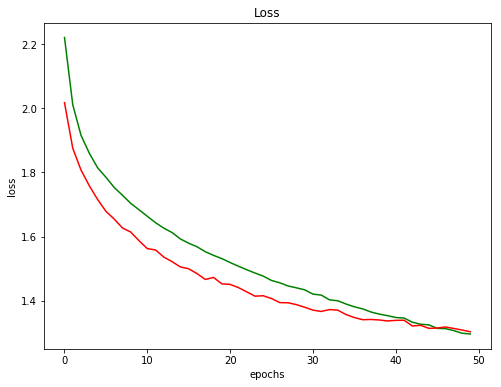

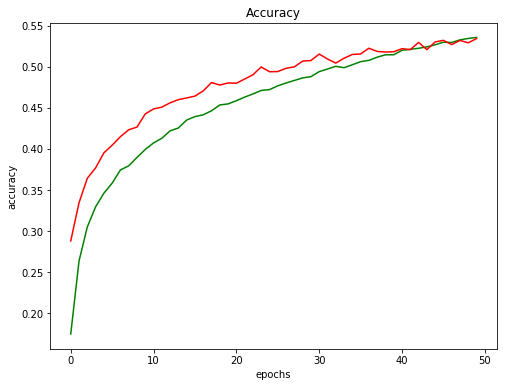

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.plot(history.history['loss'], label = "train_loss", color = 'g')
plt.plot(history.history['val_loss'], label = "valid_loss", color = 'r')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.show()

plt.figure(figsize = (8,6))
plt.plot(history.history['acc'], label = "train_acc", color = 'g')
plt.plot(history.history['val_acc'], label = "valid_acc", color = 'r')
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.show()


# Work
請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [0]:
def build_mlp2(input_shape, output_units = 10, drp_rate = 0.25):
    
    input_layer = Input(input_shape, name = "main_input")
    
    x = keras.layers.Dense(units = 512, activation = 'relu')(input_layer)
    x = keras.layers.Dropout(drp_rate)(x)
    x = keras.layers.Dense(units = 512, activation = 'relu')(x)
    x = keras.layers.Dropout(drp_rate)(x)
    x = keras.layers.Dense(units = 256, activation = 'relu')(x)
    x = keras.layers.Dropout(drp_rate)(x)
    x = keras.layers.Dense(units = 256, activation = 'relu')(x)
    x = keras.layers.Dropout(drp_rate)(x)
    x = keras.layers.Dense(units = 128, activation = 'relu')(x)
    x = keras.layers.Dropout(drp_rate)(x)
    
    output_layer = Dense(units = output_units, activation = 'softmax', name = "main_output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
    return model

In [0]:
#Setting hyper-parameters
lr = 1e-3
drp_rates = [0.1, 0.2,0.4,0.6]
epochs = 50
batch_size = 256

In [16]:
results2 = {}

for drp_rate in drp_rates:
  keras.backend.clear_session()
  model = build_mlp2(train_x.shape[1:], drp_rate = drp_rate)
  optimizer = keras.optimizers.Adam(lr = lr)
  
  model.compile(optimizer =optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
  history = model.fit(train_x, train_y, batch_size = batch_size, epochs =epochs, shuffle = True, validation_data = [test_x, test_y])
  
  name_tag = str(drp_rate)
  results2[name_tag] = {
      'train_loss' : history.history['loss'],
      'valid_loss' : history.history['val_loss'],
      'train_acc' : history.history['acc'],
      'valid_acc' : history.history['val_acc']
  }

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.9998 - acc: 0.2541 - val_loss: 1.8059 - val_acc: 0.3452
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8039 - acc: 0.3446 - val_loss: 1.7334 - val_acc: 0.3716
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7310 - acc: 0.3737 - val_loss: 1.6556 - val_acc: 0.4032
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6769 - acc: 0.3986 - val_loss: 1.5846 - val_acc: 0.4395
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6304 - acc: 0.4165 - val_loss: 1.5498 - val_acc: 0.4497
Epoch 6/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6003 - acc: 0.4256 - val_loss: 1.5550 - val_acc: 0.4420
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5694 - acc: 0.4369 - val_loss: 1.5339 - val_acc

W0718 13:02:24.059590 140044077811584 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0718 13:02:24.097619 140044077811584 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0718 13:02:24.134753 140044077811584 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0718 13:02:24.174164 140044077811584 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0718 13:02:24.213053 140044077811584 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.3392 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3027 - acc: 0.1010 - val_loss: 2.3026 - val_acc: 0.0976
Epoch 3/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3028 - acc: 0.1005 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3027 - acc: 0.1013 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 2.3028 - acc: 0.0996 - val_loss: 2.3026 - val_acc

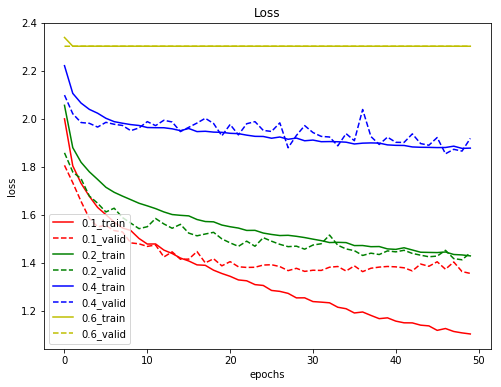

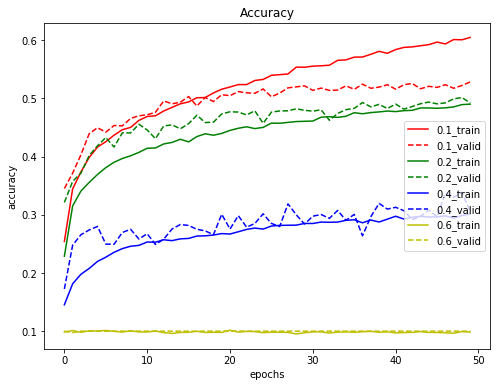

In [17]:
colors = ['r','g','b','y','k','m']
plt.figure(figsize = (8,6))

for i, cond in enumerate(results2.keys()):
    plt.plot(results2[cond]['train_loss'], '-', label = cond + "_train", color = colors[i])
    plt.plot(results2[cond]['valid_loss'], '--', label = cond + "_valid", color = colors[i])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(results2[cond]['train_acc'], '-', label = cond + '_train', color = colors[i])
    plt.plot(results2[cond]['valid_acc'], '--',label = cond + '_valid', color = colors[i])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()